Importing Required Libraries

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

Uploading datasheet file from local system

In [3]:
from google.colab import files
uploaded = files.upload()

Saving coursework_other (1).csv to coursework_other (1).csv


In [121]:
#Change filename as uploaded on colab content
filename = 'coursework_other (1).csv'
BikeData = pd.read_csv(filename, encoding='latin') 
print('Shape before deleting duplicate values:', BikeData.shape)

# Removing duplicate rows if any
BikeData=BikeData.drop_duplicates()
print('Shape After deleting duplicate values:', BikeData.shape)
BikeData.rename(columns = {'Rented Bike Count':'Rented_Bike_Count'}, inplace = True)

# Printing sample data
BikeData.head(10)

Shape before deleting duplicate values: (8760, 14)
Shape After deleting duplicate values: (8760, 14)


,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


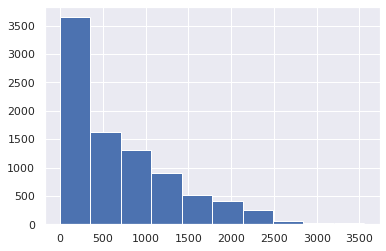

In [123]:
# Creating Bar chart as the Target variable is Continuous
BikeData['Rented_Bike_Count'].hist()

# Data Preprocessing

Splitting Date to extract month information and dropping other columns 

In [6]:
BikeData[["day", "month", "year"]] = BikeData["Date"].str.split("/", expand = True)
print("\nNew DataFrame:")
print(BikeData)


New DataFrame:
            Date  Rented_Bike_Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0           

In [7]:
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented_Bike_Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Looking at the descriptive statistics of the data
BikeData.describe(include='all')

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,31,12,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,01,12,2018
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,288,744,8016
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# observing unique values in every column
BikeData.apply(lambda x: len(x.unique()))

Date                          365
Rented_Bike_Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
day                            31
month                          12
year                            2
dtype: int64

**One Hot Encoding**

One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. One hot encoding is a crucial part of feature engineering for machine learning.

In [10]:
BikeData['Seasons'] = BikeData['Seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})

BikeData['Holiday'] = BikeData['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

BikeData['Functioning Day'] = BikeData['Functioning Day'].map({'Yes': 1, 'No': 0})
BikeData.tail()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1,30,11,2018
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1,30,11,2018
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1,30,11,2018
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,1,30,11,2018
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,3,0,1,30,11,2018


In [11]:
BikeData.describe(include='all')

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,12,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,12,2018
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288,744,8016
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.504110,0.049315,0.966324,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,0.000000,1.000000,NaN,NaN,NaN


In [12]:
# Dropping non essential columns

BikeData = BikeData.drop(columns=['Date'])
BikeData = BikeData.drop(columns=['day'])
BikeData = BikeData.drop(columns=['year'])


In [13]:
BikeData.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,12


In [14]:
# change object columns to category
cols = ['Hour','Seasons','Holiday','Functioning Day', 'month']

for col in cols:
    BikeData[col] = BikeData[col].astype('category')
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented_Bike_Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  Functioning Day            8760 non-null   category
 13  month                      8760 n

# Data Visualisation

Analysing Categorical Data

In [15]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

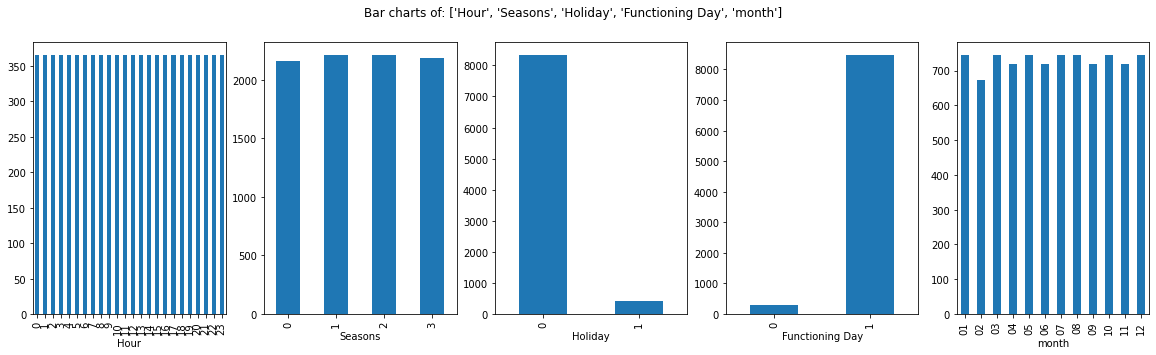

In [16]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=BikeData, colsToPlot=[
    'Hour','Seasons','Holiday','Functioning Day', 'month'])

Analysing Continuous Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8c3f17750>,
      dtype=object)

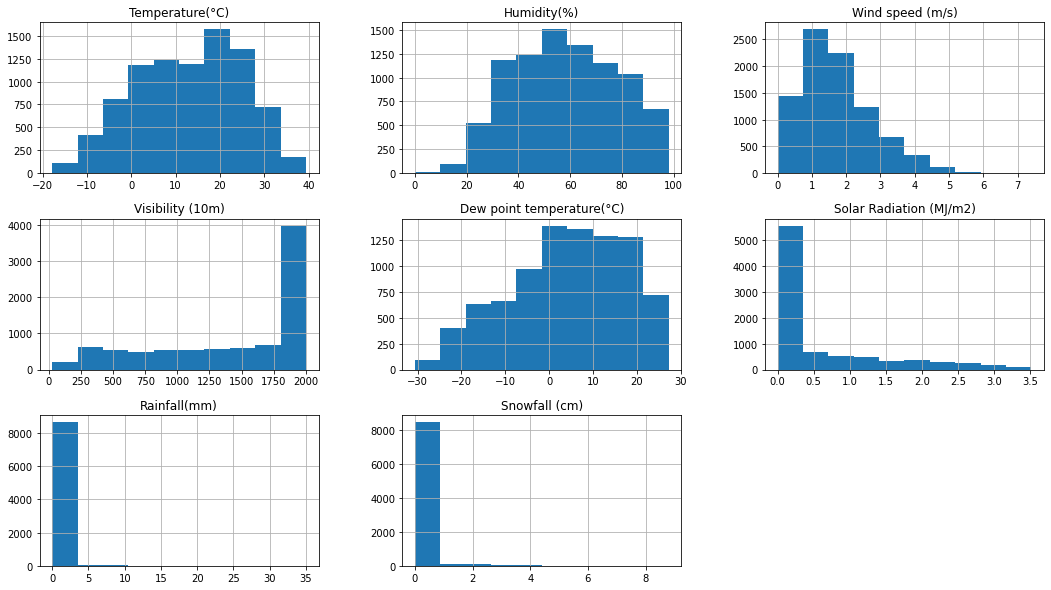

In [17]:
# Plotting histograms of multiple columns together
BikeData.hist(['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'], figsize=(18,10))

Selected Continuous Variables:

*   Temperature : Selected. The distribution is good.
*   Humidity: Selected. The distribution is good.
*   Wind speed: Selected. The distribution is good.
*   visibility: not Selected. The distribution is bad.
*   dew point: Selected. The distribution is good.
*   solar radiation: not Selected. The distribution is bad.
*   rainfall: Not Selected. The distribution is bad.
*   snowfall: Not Selected. The distribution is bad.

**Relationship exploration: Continuous Vs Continuous -- Scatter Charts**

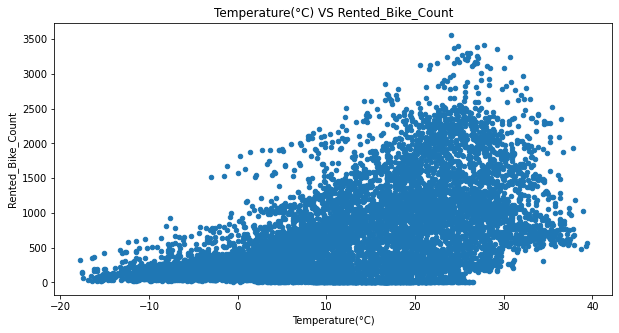

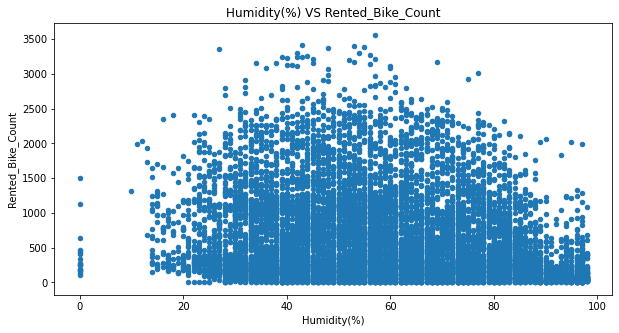

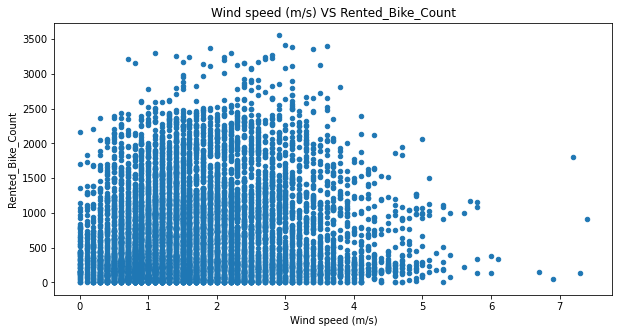

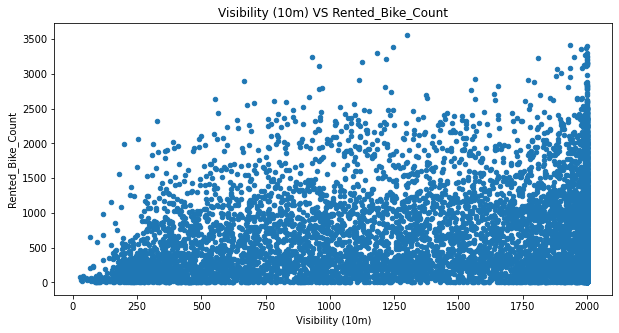

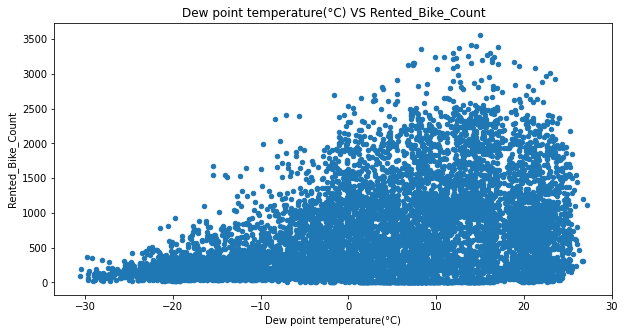

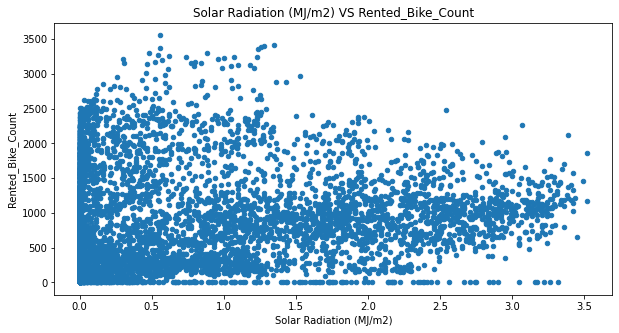

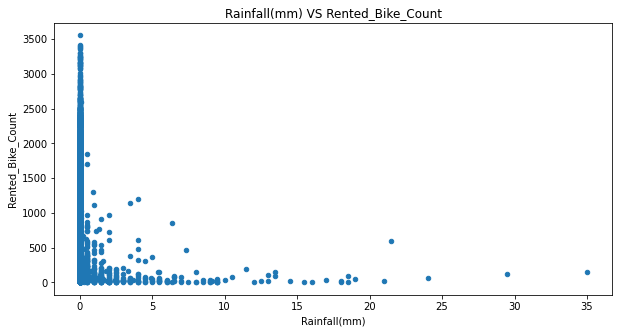

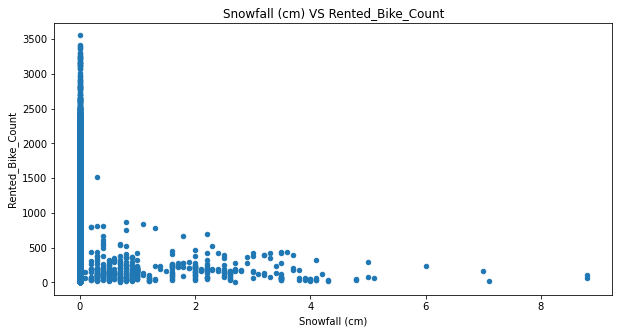

In [18]:
ContinuousCols=['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BikeData.plot.scatter(x=predictor, y='Rented_Bike_Count', figsize=(10,5), title=predictor+" VS "+ 'Rented_Bike_Count')

Covariance Heat Map between Continouous Variables

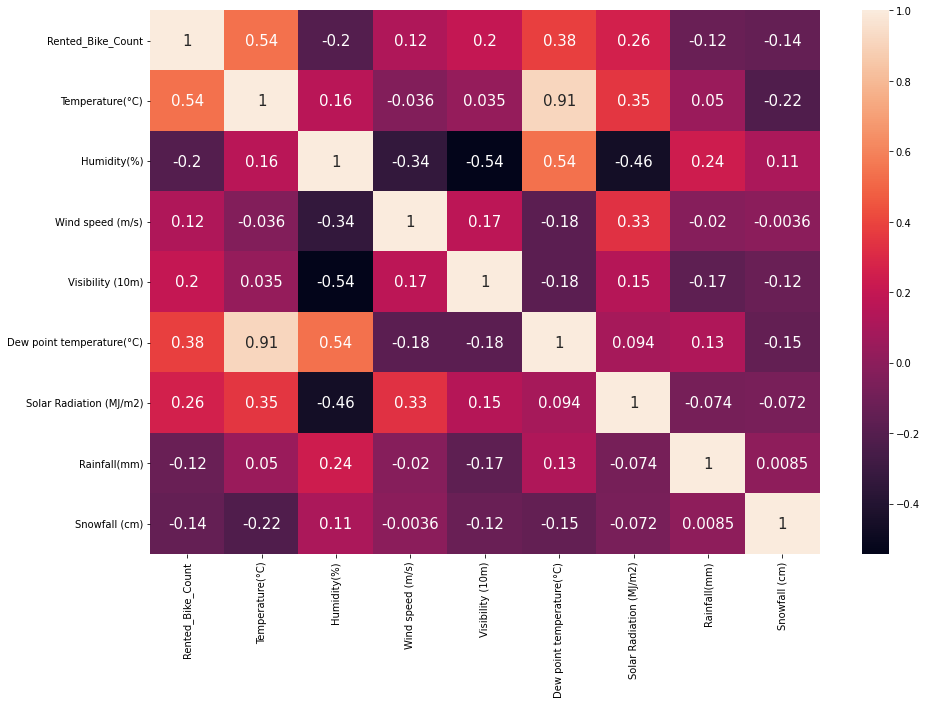

In [19]:
ContinuousCols=['Rented_Bike_Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

corr = BikeData[ContinuousCols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

Final selected Continuous columns based on correlation > 0.5 :

'Temperature'

**Relationship exploration: Categorical Vs Continuous -- Box Plots**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

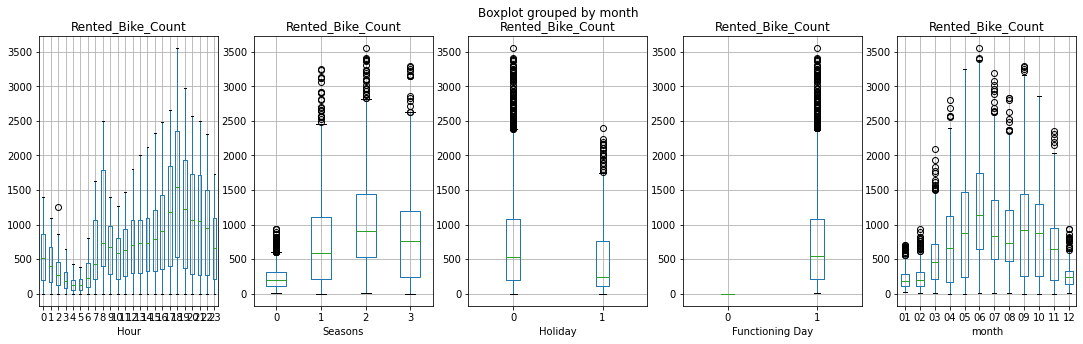

In [20]:
# Box plots for Categorical Target Variable "cnt" and continuous predictors
CategoricalColsList=['Hour','Seasons','Holiday','Functioning Day', 'month']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "cnt"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BikeData.boxplot(column='Rented_Bike_Count', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

ANOVA TEST


In [21]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [22]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Hour','Seasons','Holiday','Functioning Day', 'month']
FunctionAnova(inpData=BikeData, 
              TargetVariable='Rented_Bike_Count', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Hour is correlated with Rented_Bike_Count | P-Value: 0.0
Seasons is correlated with Rented_Bike_Count | P-Value: 0.0
Holiday is correlated with Rented_Bike_Count | P-Value: 1.2156443235104595e-11
Functioning Day is correlated with Rented_Bike_Count | P-Value: 6.732210575545294e-83
month is correlated with Rented_Bike_Count | P-Value: 0.0


['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month']

**Selecting final predictors for Machine Learning**

In [23]:
SelectedColumns=['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Hour','Seasons','Holiday','Functioning Day', 'month']

# Selecting final columns
DataForML=BikeData[SelectedColumns]
DataForML.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour,Seasons,Holiday,Functioning Day,month
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,12
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,1,12
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2,0,0,1,12
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,0,1,12
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,0,1,12


In [24]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [25]:

# Adding Target Variable to the data
DataForML['Rented_Bike_Count']=BikeData['Rented_Bike_Count']

DataForML.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour,Seasons,Holiday,Functioning Day,month,Rented_Bike_Count
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,12,254
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,1,12,204
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2,0,0,1,12,173
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,0,1,12,107
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,0,1,12,78


Machine Learning: Splitting the data into Training and Testing sample


In [27]:
# Printing all the column names for our reference
DataForML.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour',
       'Seasons', 'Holiday', 'Functioning Day', 'month', 'Rented_Bike_Count'],
      dtype='object')

In [28]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rented_Bike_Count'
Predictors=['Temperature(°C)','Hour','Seasons','Holiday','Functioning Day', 'month','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

Standardization/Normalization of data

In [29]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
# PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X_ref = X
X=PredictorScalerFit.transform(X)

print(np.array_equal(X_ref,X))

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

False


In [30]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7446, 11)
(7446,)
(1314, 11)
(1314,)


# Multiple Linear Regression (BaseLine)

In [129]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value train:',metrics.r2_score(y_train, LREG.predict(X_train)))
print('R2 Value test:',metrics.r2_score(y_test, LREG.predict(X_test)))
print('MSE Value train:',metrics.mean_squared_error(y_train, LREG.predict(X_train)))
print('MSE Value test:',metrics.mean_squared_error(y_test, LREG.predict(X_test)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('LR Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'LR Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rented_Bike_Count']-TestingDataResults['LR PredictedRented_Bike_Count']))/TestingDataResults['Rented_Bike_Count'])

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring='r2')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


LinearRegression()
R2 Value train: 0.5317498374768005
R2 Value test: 0.5474023547221212
MSE Value train: 195692.47694844127
MSE Value test: 182554.90745824628

##### Model Validation and Accuracy Calculations ##########
   Rented_Bike_Count  LR PredictedRented_Bike_Count
0                 31                           36.0
1                905                         1000.0
2               1375                          957.0
3               1107                         1125.0
4                414                          487.0

Accuracy values for 10-fold Cross Validation:
 [-14.83189614  -5.18214902   0.07134343   0.51473927   0.30103542
   0.29638333  -0.07268382   0.3902378    0.57249551   0.38527449]

Final Average Accuracy of the model: -1.76


# Neural Network

In [124]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.model_selection import learning_curve

In [39]:
#  {'activation': 'relu', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
# {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32, 16, 8), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}

In [ ]:
# Defigning Model
reg = MLPRegressor(hidden_layer_sizes=(64,32,16,8),activation="relu" ,random_state=1, max_iter=2000,solver='adam',learning_rate='constant',learning_rate_init = 0.001,alpha=0.0001,verbose=4).fit(X_train, y_train)

In [41]:
#Predicting accuracy on test set and train set
y_pred=reg.predict(X_test)
print("The Score with ", (r2_score(y_pred, y_test)))
print("The train Score with ", (r2_score(reg.predict(X_train), y_train)))

The Score with  0.8439736898690531
The train Score with  0.8725385036859445


In [128]:
print("RME Test ", (mean_squared_error(y_pred,y_test)))
print("RME Train ", (mean_squared_error(reg.predict(X_train), y_train)))

RME Test  57167.01056001604
RME Train  47784.99170347772


**Hyper-Parameter Tuning - Grid-Search**

In [45]:
#Applying Grid-search to find optimize hyper-parameters
param_grid = {
    'hidden_layer_sizes':[(64,32,16,8),(32,16,16,8)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': [0.001,0.0001]
}

In [ ]:
grid = GridSearchCV(reg, param_grid, n_jobs= 4, cv=2,verbose=4,scoring='r2',return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)
df_grid = pd.DataFrame(grid.cv_results_)

In [60]:
df_grid.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
count,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,68.683878,7.408112,0.020660,0.002757,-6.379180e+133,-0.030288,-3.189590e+133,3.189590e+133,32.218750,-6.096902e+133,-1.370162e-02,-3.048451e+133,3.048451e+133
std,68.480550,17.845331,0.014880,0.003007,2.490180e+134,0.727933,1.245090e+134,1.245090e+134,18.674717,2.379990e+134,7.378309e-01,1.189995e+134,1.189995e+134
min,0.510193,0.005493,0.003449,0.000071,-1.022217e+135,-1.862339,-5.111085e+134,6.679023e-04,1.000000,-9.769840e+134,-1.868787e+00,-4.884920e+134,5.063163e-05
25%,3.993841,0.158195,0.010485,0.000474,-7.028059e+08,-0.316509,-3.514029e+08,5.241772e-03,16.500000,-6.717076e+08,-2.899001e-01,-3.358538e+08,6.299550e-03
50%,44.689184,0.379046,0.016074,0.002593,-5.723524e-02,-0.000404,-1.064037e-01,1.142204e-02,32.500000,-6.599043e-02,-6.343980e-07,-1.082700e-01,1.278629e-02
75%,126.852139,1.364073,0.025818,0.003636,4.656133e-01,0.475194,4.704807e-01,3.514029e+08,47.500000,4.660817e-01,5.014497e-01,4.838498e-01,3.358538e+08
max,213.001260,71.643731,0.064563,0.017991,8.211294e-01,0.819794,8.204615e-01,5.111085e+134,63.000000,8.886197e-01,8.801985e-01,8.823046e-01,4.884920e+134


In [61]:
grid_predictions = grid.predict(X_test) 

In [62]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
0,31,78.080350
1,905,815.326533
2,1375,904.257580
3,1107,1178.646598
4,414,285.091873


**Plotting Grid-Search Results**

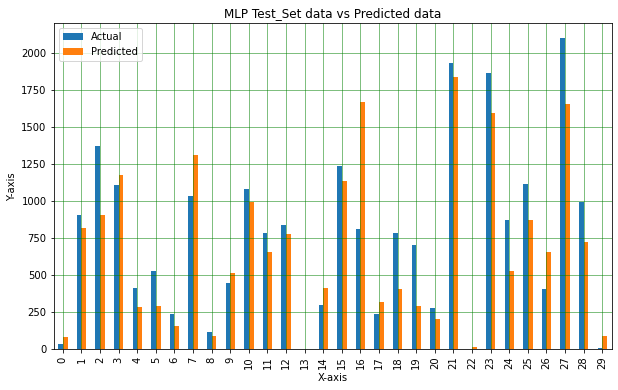

<Figure size 432x288 with 0 Axes>

In [64]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("MLP Test_Set data vs Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
plt.savefig(f'MLP_prediction.png', format='png', dpi=100);

In [75]:
df_grid.head()
interest = ['param_activation','param_alpha','param_hidden_layer_sizes','param_learning_rate','param_learning_rate_init','param_solver','mean_test_score','mean_train_score']

In [81]:
d = df_grid[interest]
d.head()

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,mean_test_score,mean_train_score
0,tanh,0.0001,"(64, 32, 16, 8)",constant,0.001,sgd,0.079603,0.071807
1,tanh,0.0001,"(64, 32, 16, 8)",constant,0.001,adam,-0.300894,-0.292990
2,tanh,0.0001,"(64, 32, 16, 8)",constant,0.0001,sgd,0.326464,0.330941
3,tanh,0.0001,"(64, 32, 16, 8)",constant,0.0001,adam,-1.088643,-1.088643
4,tanh,0.0001,"(64, 32, 16, 8)",adaptive,0.001,sgd,0.093191,0.084504


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  # Remove the CWD from sys.path while we load stuff.


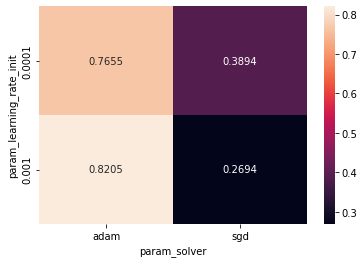

In [73]:
max_scores = df_grid.groupby(['param_learning_rate_init', 
                                    'param_solver']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


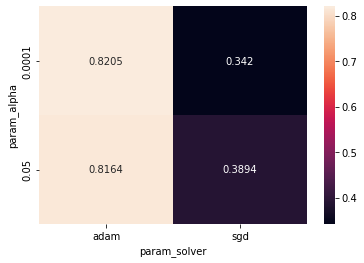

In [74]:
max_scores = df_grid.groupby(['param_alpha', 
                                    'param_solver']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


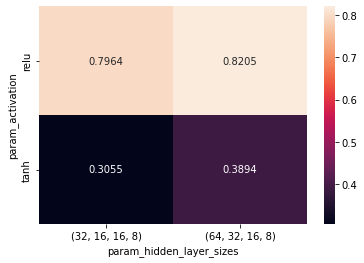

In [70]:
max_scores = df_grid.groupby(['param_activation', 
                                    'param_hidden_layer_sizes']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


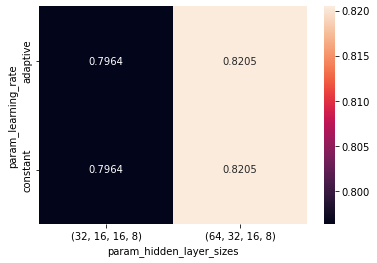

In [71]:
max_scores = df_grid.groupby(['param_learning_rate', 
                                    'param_hidden_layer_sizes']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  


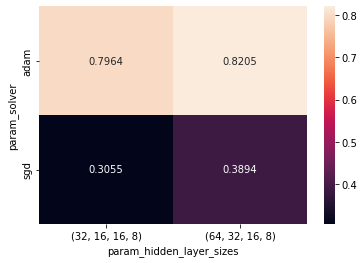

In [72]:
max_scores = df_grid.groupby(['param_solver', 
                                    'param_hidden_layer_sizes']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfmodel = RandomForestRegressor(n_jobs=-1, random_state=42, verbose=2)

grid = {'n_estimators': [10, 18, 33, 60, 110, 200,250],
        'max_features': [0.05, 0.07, 0.09, 0.11, 0.17, 0.19, 0.25],
        'min_samples_split': [2, 3, 5, 8, 13, 50, 126, 200]}

rf_gridsearch = GridSearchCV(estimator=rfmodel, param_grid=grid, n_jobs=4, 
                             cv=4, verbose=2, return_train_score=True)

rf_gridsearch.fit(X_train, y_train)


df_gridsearch = pd.DataFrame(rf_gridsearch.cv_results_)

In [84]:
print(rf_gridsearch.best_params_)

{'max_features': 0.19, 'min_samples_split': 2, 'n_estimators': 250}


In [89]:
random_model = RandomForestRegressor(n_estimators=250,max_features=0.19,min_samples_split=2)
rm = random_model.fit(X_train,y_train)

In [90]:
scoretrain = rm.score(X_train, y_train)
print("R-squared train:", scoretrain) 
scoretest = rm.score(X_test, y_test)
print("R-squared test:", scoretest) 

R-squared train: 0.9811365868083471
R-squared test: 0.8658037739227038


In [131]:
from sklearn.metrics import mean_squared_error
ypred = rm.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE Test: ", mse)
print("MSE Train: ", mean_squared_error(y_train, rm.predict(X_train)))


# MSE:  0.130713987032462
# RMSE:  0.065356993516231 

MSE Test:  54127.94319277929
MSE Train:  7883.452792167606


In [95]:
rf_gridpred = rf_gridsearch.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.3s finished


In [96]:
df_temp3 = pd.DataFrame({'Actual': y_test, 'Predicted': rf_gridpred})
df_temp3.head()

,Actual,Predicted
0,31,83.732
1,905,928.512
2,1375,1151.896
3,1107,948.240
4,414,233.876


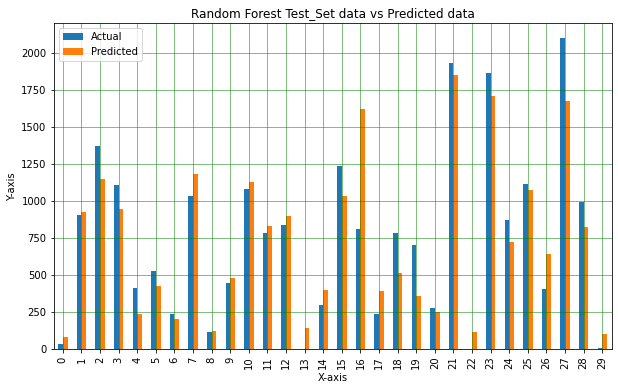

<Figure size 432x288 with 0 Axes>

In [99]:
df_temp3 = df_temp3.head(30)
df_temp3.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Random Forest Test_Set data vs Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
plt.savefig(f'Random_forest_prediction.png', format='png', dpi=100);

In [101]:
df_gridsearch.head()
evaluation = ['param_max_features','param_min_samples_split','param_n_estimators','mean_test_score','mean_train_score']

In [103]:
e=df_gridsearch[evaluation]
e.head()

,param_max_features,param_min_samples_split,param_n_estimators,mean_test_score,mean_train_score
0,0.05,2,10,0.809271,0.963086
1,0.05,2,18,0.822012,0.969295
2,0.05,2,33,0.830459,0.973573
3,0.05,2,60,0.832885,0.975245
4,0.05,2,110,0.835474,0.976307


In [104]:
df_gridsearch['size'] = (df_gridsearch.mean_test_score / 
                         df_gridsearch.mean_test_score.max()) ** 100 * 20 + 1

In [105]:
text_list = list(
    zip(
        'max_features: ' + df_gridsearch['param_max_features'].apply(str),
        'n_estimators: ' + df_gridsearch['param_n_estimators'].apply(str),
        'min_samples_split: ' + df_gridsearch['param_min_samples_split'].apply(str),
        'Test score: ' + df_gridsearch.mean_test_score.round(4).apply(str),
        'Train score: ' + df_gridsearch.mean_train_score.round(4).apply(str),
        'Training time: ' + (df_gridsearch.mean_fit_time // 60).astype('int').apply(str) + ' mins ' + \
            (df_gridsearch.mean_fit_time % 60).astype('int').apply(str) + ' s',
#         'Training time: ' + df_gridsearch.mean_fit_time.round(2).apply(str) + 's',
    )
)

text = ['<br>'.join(t) for t in text_list]

In [106]:
df_gridsearch['Text'] = text

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline

import cufflinks as cf

# import plotly.plotly as py

# Import modules to work with data visualizations offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Connect to the plotly.js CDN with the init_notebook_mode() method
# so that the js code is fetched from a cdn, not saved into the notebook
init_notebook_mode(connected=True)

# Use cufflinks offline, don't push plots to the cloud
cf.go_offline()

import plotly.graph_objs as go

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# from data_processing import *
# from ml import *

In [108]:
df_gridsearch.mean_train_score.max()

0.9797416550843702

In [109]:
df_gridsearch.mean_test_score.max()

0.8554222378146774

In [110]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)

In [111]:
max_scores = df_gridsearch.groupby(['param_min_samples_split',
                                    'param_max_features']).max().unstack()[['mean_test_score', 'mean_train_score']]
max_scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



mean_test_score                                \
param_max_features                 0.05      0.07      0.09      0.11   
param_min_samples_split                                                 
2                              0.836283  0.836283  0.836283  0.836283   
3                              0.833059  0.833059  0.833059  0.833059   
5                              0.829536  0.829536  0.829536  0.829536   
8                              0.820159  0.820159  0.820159  0.820159   
13                             0.812322  0.812322  0.812322  0.812322   
50                             0.761783  0.761783  0.761783  0.761783   
126                            0.719896  0.719896  0.719896  0.719896   
200                            0.672225  0.672225  0.672225  0.672225   

                                                      mean_train_score  \
param_max_features           0.17      0.19      0.25             0.05   
param_min_samples_split                                                  
2                        0.836283  0.855422  0.855422         0.977232   
3                        0.833059  0.854477  0.854477         0.966484   
5                        0.829536  0.851016  0.851016         0.946146   
8                        0.820159  0.846157  0.846157         0.921008   
13                       0.812322  0.842076  0.842076         0.892237   
50                       0.761783  0.807083  0.807083         0.801524   
126                      0.719896  0.767017  0.767017         0.739655   
200                      0.672225  0.735687  0.735687         0.691190   

                                                                           \
param_max_features           0.07      0.09      0.11      0.17      0.19   
param_min_samples_split                                                     
2                        0.977232  0.977232  0.977232  0.977232  0.979742   
3                        0.966484  0.966484  0.966484  0.966484  0.972762   
5                        0.946146  0.946146  0.946146  0.946146  0.957666   
8                        0.921008  0.921008  0.921008  0.921008  0.937997   
13                       0.892237  0.892237  0.892237  0.892237  0.915519   
50                       0.801524  0.801524  0.801524  0.801524  0.842866   
126                      0.739655  0.739655  0.739655  0.739655  0.787834   
200                      0.691190  0.691190  0.691190  0.691190  0.751264   

                                   
param_max_features           0.25  
param_min_samples_split            
2                        0.979742  
3                        0.972762  
5                        0.957666  
8                        0.937997  
13                       0.915519  
50                       0.842866  
126                      0.787834  
200                      0.751264

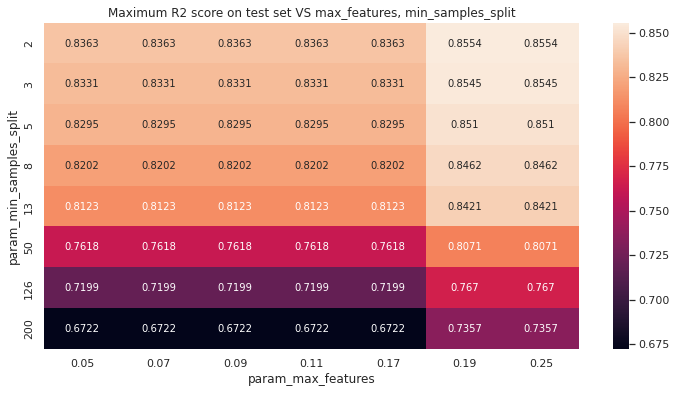

In [112]:
title = 'Maximum R2 score on test set VS max_features, min_samples_split'
fmt = 'png'
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);
plt.savefig(f'{title}.{fmt}', format=fmt, dpi=100);

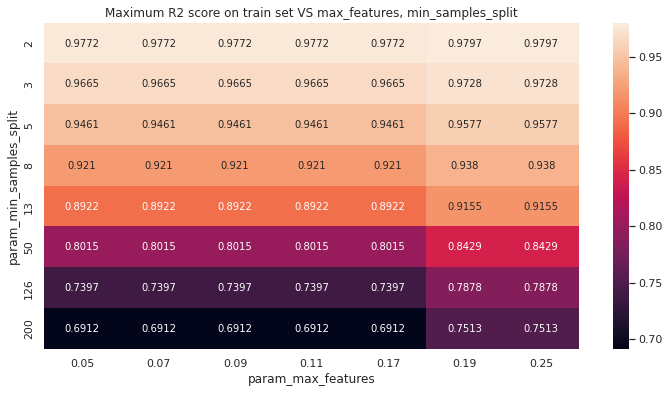

In [113]:
title = 'Maximum R2 score on train set VS max_features, min_samples_split'
fmt = 'png'
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);
plt.savefig(f'{title}.{fmt}', format=fmt, dpi=300)

In [114]:
max_scores = df_gridsearch.groupby(['param_min_samples_split',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
max_scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



mean_test_score                                \
param_n_estimators                  10        18        33        60    
param_min_samples_split                                                 
2                              0.832332  0.843886  0.849979  0.853236   
3                              0.830149  0.843430  0.846829  0.850070   
5                              0.828565  0.841729  0.846560  0.848603   
8                              0.829085  0.836806  0.841035  0.842712   
13                             0.828633  0.837293  0.837915  0.839017   
50                             0.791865  0.802143  0.801702  0.802584   
126                            0.756095  0.765906  0.766143  0.766660   
200                            0.735420  0.732573  0.731399  0.733283   

                                                      mean_train_score  \
param_n_estimators            110       200       250              10    
param_min_samples_split                                                  
2                        0.853920  0.855062  0.855422         0.968389   
3                        0.853287  0.854274  0.854477         0.961344   
5                        0.849535  0.851016  0.850901         0.946107   
8                        0.844692  0.846119  0.846157         0.927064   
13                       0.841556  0.842076  0.841765         0.905071   
50                       0.804117  0.806438  0.807083         0.830315   
126                      0.767017  0.766191  0.766323         0.778876   
200                      0.734423  0.735564  0.735687         0.749488   

                                                                           \
param_n_estimators            18        33        60        110       200   
param_min_samples_split                                                     
2                        0.973435  0.976846  0.978046  0.978908  0.979522   
3                        0.967257  0.969747  0.971124  0.971990  0.972614   
5                        0.951674  0.954805  0.955907  0.956751  0.957523   
8                        0.930999  0.934689  0.936269  0.937542  0.937808   
13                       0.911991  0.913549  0.913583  0.914932  0.915519   
50                       0.837848  0.838767  0.839068  0.840774  0.842541   
126                      0.786557  0.787834  0.787763  0.787361  0.786338   
200                      0.746825  0.746824  0.749441  0.750095  0.751254   

                                   
param_n_estimators            250  
param_min_samples_split            
2                        0.979742  
3                        0.972762  
5                        0.957666  
8                        0.937997  
13                       0.915447  
50                       0.842866  
126                      0.786399  
200                      0.751264

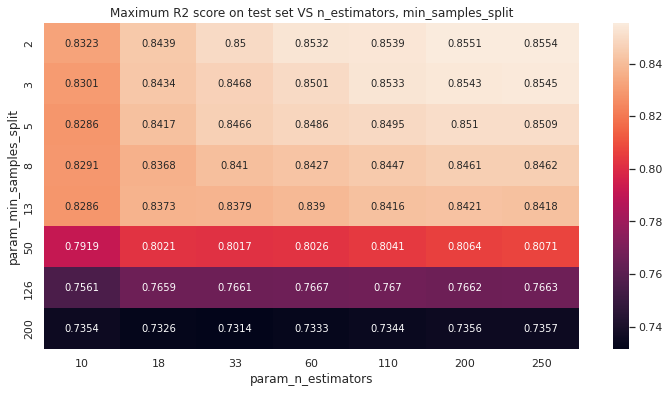

In [115]:
title = 'Maximum R2 score on test set VS n_estimators, min_samples_split'
fmt = 'png'
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);
plt.savefig(f'{title}.{fmt}', format=fmt, dpi=300)

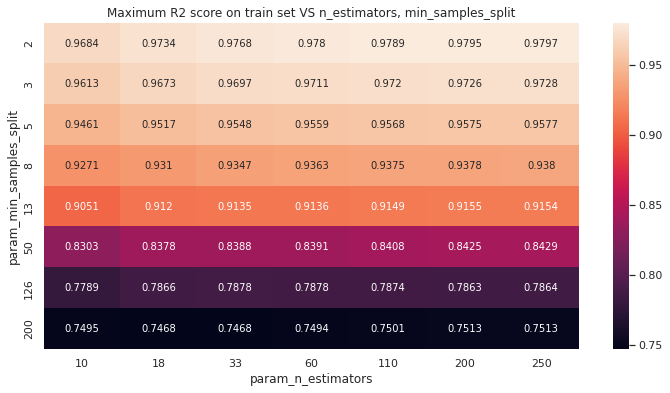

In [116]:
title = 'Maximum R2 score on train set VS n_estimators, min_samples_split'
fmt = 'jpg'
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);
plt.savefig(f'{title}.{fmt}', format=fmt, dpi=300)

In [117]:
max_scores = df_gridsearch.groupby(['param_max_features',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
max_scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



mean_test_score                                          \
param_n_estimators             10        18        33        60        110   
param_max_features                                                           
0.05                      0.809271  0.822012  0.830459  0.832885  0.835474   
0.07                      0.809271  0.822012  0.830459  0.832885  0.835474   
0.09                      0.809271  0.822012  0.830459  0.832885  0.835474   
0.11                      0.809271  0.822012  0.830459  0.832885  0.835474   
0.17                      0.809271  0.822012  0.830459  0.832885  0.835474   
0.19                      0.832332  0.843886  0.849979  0.853236  0.853920   
0.25                      0.832332  0.843886  0.849979  0.853236  0.853920   

                                       mean_train_score                      \
param_n_estimators       200       250              10        18        33    
param_max_features                                                            
0.05                0.836283  0.836017         0.963086  0.969295  0.973573   
0.07                0.836283  0.836017         0.963086  0.969295  0.973573   
0.09                0.836283  0.836017         0.963086  0.969295  0.973573   
0.11                0.836283  0.836017         0.963086  0.969295  0.973573   
0.17                0.836283  0.836017         0.963086  0.969295  0.973573   
0.19                0.855062  0.855422         0.968389  0.973435  0.976846   
0.25                0.855062  0.855422         0.968389  0.973435  0.976846   

                                                            
param_n_estimators       60        110       200       250  
param_max_features                                          
0.05                0.975245  0.976307  0.977104  0.977232  
0.07                0.975245  0.976307  0.977104  0.977232  
0.09                0.975245  0.976307  0.977104  0.977232  
0.11                0.975245  0.976307  0.977104  0.977232  
0.17                0.975245  0.976307  0.977104  0.977232  
0.19                0.978046  0.978908  0.979522  0.979742  
0.25                0.978046  0.978908  0.979522  0.979742

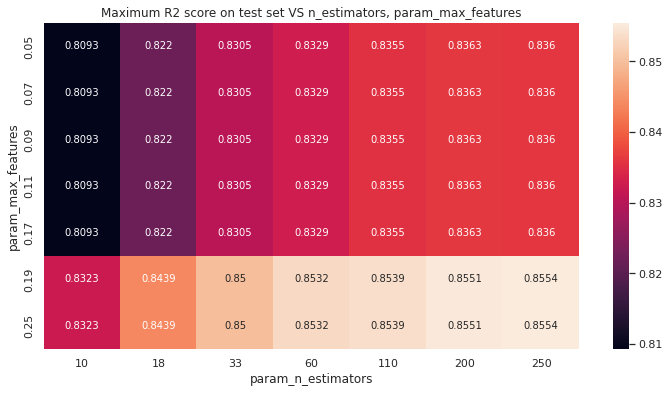

In [118]:
title = 'Maximum R2 score on test set VS n_estimators, param_max_features'
fmt = 'png'
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);
plt.savefig(f'{title}.{fmt}', format=fmt, dpi=300)

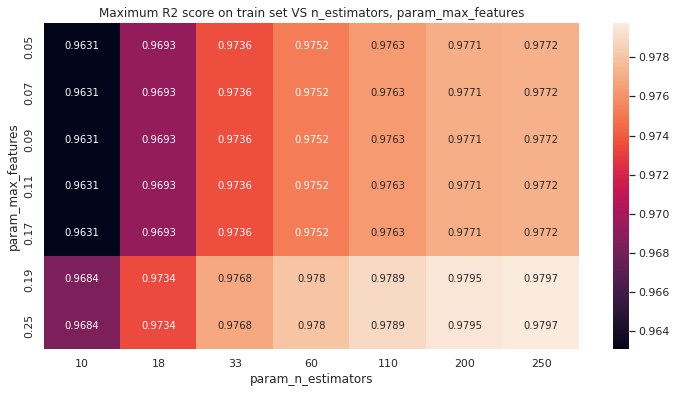

In [119]:
title = 'Maximum R2 score on train set VS n_estimators, min_samples_split'
fmt = 'jpg'
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);
plt.savefig(f'{title}.{fmt}', format=fmt, dpi=300)